Installing required liberies

In [2]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 25.9 MB/s eta 0:00:00


Mounting the GDrive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Performing NDVI vegetation indices**

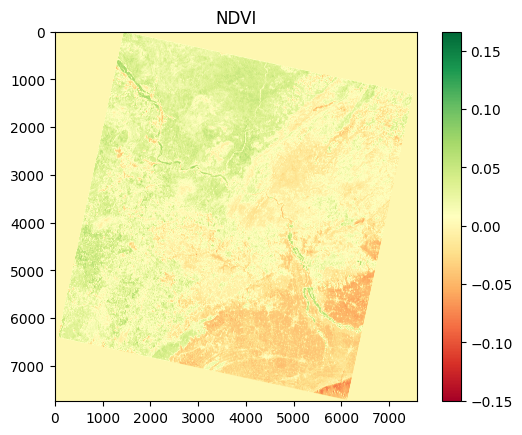

In [ ]:
import numpy as np
from google.colab import drive
import rasterio
import matplotlib.pyplot as plt

# Step 2: Providing paths
red_band_path = '/content/drive/MyDrive/Agrifarm/Dataset/tif/LC08_L2SP_142048_20240328_20240410_02_T1_SR_B3 (1).TIF'
nir_band_path = '/content/drive/MyDrive/Agrifarm/Dataset/tif/LC08_L2SP_142048_20240328_20240410_02_T1_SR_B4 (2).TIF'

# Step 3: Open each TIF file
with rasterio.open(red_band_path) as red_src, rasterio.open(nir_band_path) as nir_src:
    red_band = red_src.read(1).astype(float)  # Convert to float for division
    nir_band = nir_src.read(1).astype(float)

    # Step 4: NDVI Calculation (ignoring divide by zero warning)
    np.seterr(divide='ignore', invalid='ignore')  # Suppress division warnings
    ndvi = (nir_band - red_band) / (nir_band + red_band)
    ndvi[np.isnan(ndvi)] = 0  # Set NaN values to 0 or another value if preferred

# Step 5: Visualize NDVI
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar()
plt.title('NDVI')
plt.show()


**Another NDVI VALUE **

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


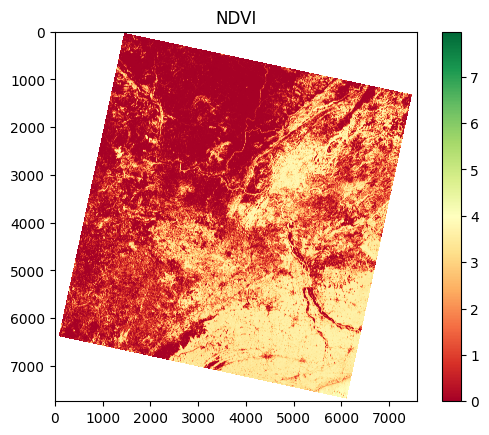

In [ ]:
from google.colab import drive
import rasterio
import matplotlib.pyplot as plt


drive.mount('/content/drive')

# Step 2: Providing  paths
red_band_path = '/content/drive/MyDrive/Agrifarm/Dataset/tif/LC08_L2SP_142048_20240328_20240410_02_T1_SR_B3 (1).TIF'
nir_band_path = '/content/drive/MyDrive/Agrifarm/Dataset/tif/LC08_L2SP_142048_20240328_20240410_02_T1_SR_B4 (2).TIF'

# Step 3: Open each TIF file
with rasterio.open(red_band_path) as red_src, rasterio.open(nir_band_path) as nir_src:
    red_band = red_src.read(1)  # Read the red band (Band 3)
    nir_band = nir_src.read(1)  # Read the NIR band (Band 4)

    # Step 4: NDVI Calculation
    ndvi = (nir_band - red_band) / (nir_band + red_band)

# Step 5: Visualize NDVI
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar()
plt.title('NDVI')
plt.show()


Performing EVI ,ASVI and GNDVI vegetation indices

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


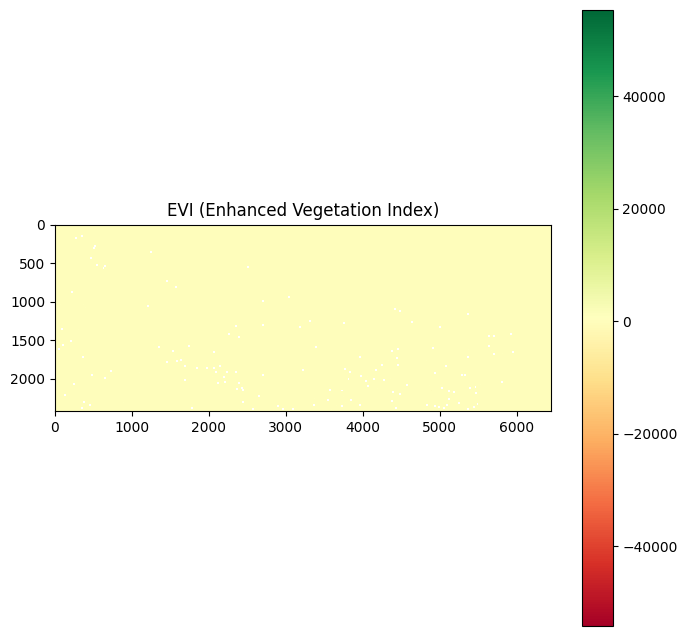

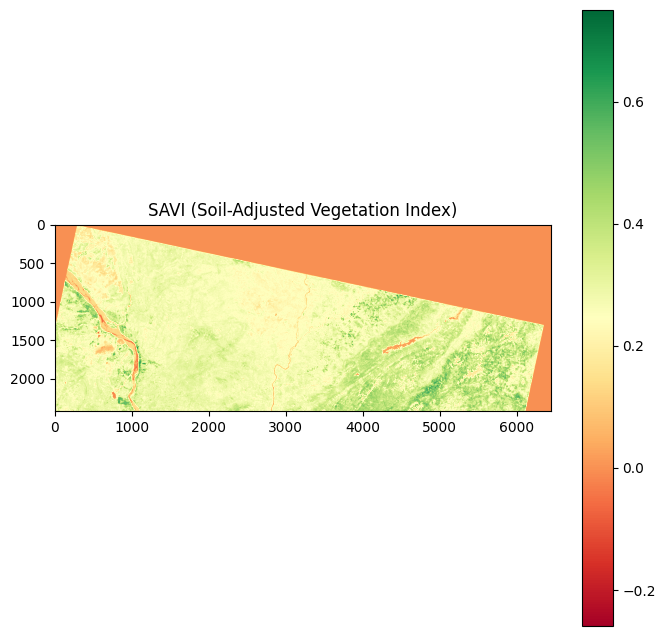

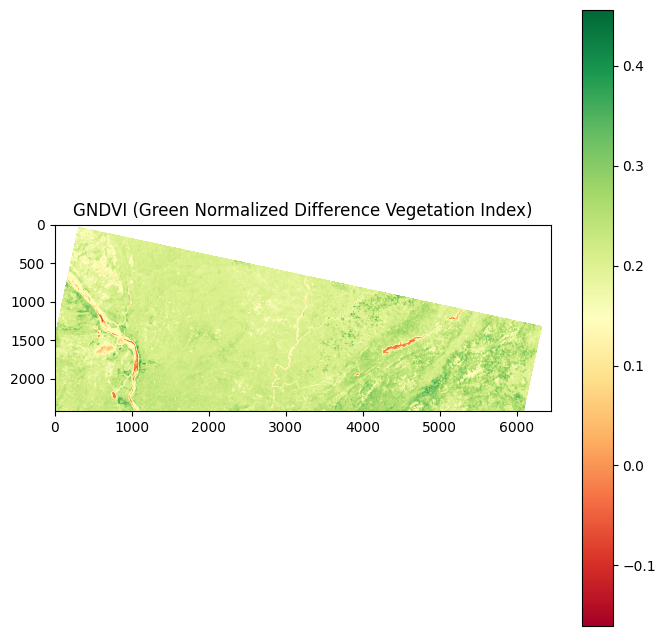

In [ ]:
# Import necessary libraries
import rasterio
from rasterio.windows import from_bounds
import matplotlib.pyplot as plt


from google.colab import drive
drive.mount('/content/drive')

# Step 2:  TIF files
blue_band_path = '/content/drive/MyDrive/Agrifarm/Dataset/tif/LC08_L2SP_142049_20240328_20240410_02_T1_SR_B2 (1).TIF'  # Blue Band (Band 2)
green_band_path = '/content/drive/MyDrive/Agrifarm/Dataset/tif/LC08_L2SP_142048_20240328_20240410_02_T1_SR_B3 (1).TIF'  # Green Band (Band 3)
red_band_path = '/content/drive/MyDrive/Agrifarm/Dataset/tif/LC08_L2SP_142048_20240328_20240410_02_T1_SR_B4 (2).TIF'  # Red Band (Band 4)
nir_band_path = '/content/drive/MyDrive/Agrifarm/Dataset/tif/LC08_L2SP_142048_20240328_20240410_02_T1_SR_B5 (2).TIF'  # NIR Band (Band 5)


with rasterio.open(blue_band_path) as blue_src, \
     rasterio.open(green_band_path) as green_src, \
     rasterio.open(red_band_path) as red_src, \
     rasterio.open(nir_band_path) as nir_src:

    # Get the bounds of each band
    blue_bounds = blue_src.bounds
    green_bounds = green_src.bounds
    red_bounds = red_src.bounds
    nir_bounds = nir_src.bounds

    # Calculate the intersection of all bounds
    minx = max(blue_bounds.left, green_bounds.left, red_bounds.left, nir_bounds.left)
    miny = max(blue_bounds.bottom, green_bounds.bottom, red_bounds.bottom, nir_bounds.bottom)
    maxx = min(blue_bounds.right, green_bounds.right, red_bounds.right, nir_bounds.right)
    maxy = min(blue_bounds.top, green_bounds.top, red_bounds.top, nir_bounds.top)


    intersect_window = from_bounds(minx, miny, maxx, maxy, blue_src.transform)


    blue_band = blue_src.read(1, window=intersect_window).astype('float32')
    green_band = green_src.read(1, window=intersect_window).astype('float32')
    red_band = red_src.read(1, window=intersect_window).astype('float32')
    nir_band = nir_src.read(1, window=intersect_window).astype('float32')

# Step 4: Calculate Vegetation Indices

# EVI
L = 1
G = 2.5
C1 = 6
C2 = 7.5
evi = G * (nir_band - red_band) / (nir_band + C1 * red_band - C2 * blue_band + L)


L_savi = 0.5
savi = ((nir_band - red_band) / (nir_band + red_band + L_savi)) * (1 + L_savi)


gndvi = (nir_band - green_band) / (nir_band + green_band)


def plot_vegetation_index(index_data, title, cmap='RdYlGn'):
    plt.figure(figsize=(8, 8))
    plt.imshow(index_data, cmap=cmap)
    plt.colorbar()
    plt.title(title)
    plt.show()

# Step 5: ploting
plot_vegetation_index(evi, 'EVI (Enhanced Vegetation Index)')
plot_vegetation_index(savi, 'SAVI (Soil-Adjusted Vegetation Index)')
plot_vegetation_index(gndvi, 'GNDVI (Green Normalized Difference Vegetation Index)')


 **Performing Soil Moisture Content**

<ipython-input-8-f3a5f3d97c8f>:45: RuntimeWarning: invalid value encountered in divide
  ndmi = (nir_band - swir_band) / (nir_band + swir_band)


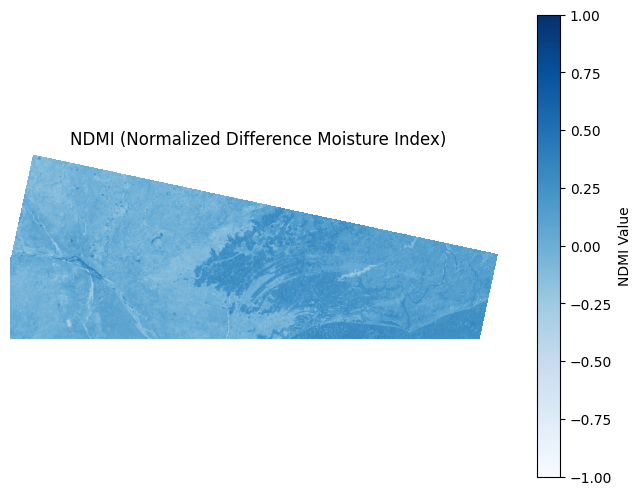

In [ ]:
# Import necessary libraries
import rasterio
from rasterio.windows import from_bounds
import matplotlib.pyplot as plt


# Step 2: Defining TIF locations
blue_band_path = '/content/drive/MyDrive/Agrifarm/Dataset/tif/LC08_L2SP_142049_20240328_20240410_02_T1_SR_B2 (1).TIF'  # Blue Band (Band 2)
green_band_path = '/content/drive/MyDrive/Agrifarm/Dataset/tif/LC08_L2SP_142048_20240328_20240410_02_T1_SR_B3 (1).TIF'  # Green Band (Band 3)
red_band_path = '/content/drive/MyDrive/Agrifarm/Dataset/tif/LC08_L2SP_142048_20240328_20240410_02_T1_SR_B4 (2).TIF'  # Red Band (Band 4)
nir_band_path = '/content/drive/MyDrive/Agrifarm/Dataset/tif/LC08_L2SP_142048_20240328_20240410_02_T1_SR_B5 (2).TIF'  # NIR Band (Band 5)
swir_band_path = '/content/drive/MyDrive/Agrifarm/Dataset/tif/LC08_L2SP_142049_20240328_20240410_02_T1_SR_B6 (1).TIF'  # SWIR Band (Band 6)


with rasterio.open(blue_band_path) as blue_src, \
     rasterio.open(green_band_path) as green_src, \
     rasterio.open(red_band_path) as red_src, \
     rasterio.open(nir_band_path) as nir_src, \
     rasterio.open(swir_band_path) as swir_src:

    # Get the bounds of each band
    blue_bounds = blue_src.bounds
    green_bounds = green_src.bounds
    red_bounds = red_src.bounds
    nir_bounds = nir_src.bounds
    swir_bounds = swir_src.bounds

    # Calculate the intersection of all bounds
    minx = max(blue_bounds.left, green_bounds.left, red_bounds.left, nir_bounds.left, swir_bounds.left)
    miny = max(blue_bounds.bottom, green_bounds.bottom, red_bounds.bottom, nir_bounds.bottom, swir_bounds.bottom)
    maxx = min(blue_bounds.right, green_bounds.right, red_bounds.right, nir_bounds.right, swir_bounds.right)
    maxy = min(blue_bounds.top, green_bounds.top, red_bounds.top, nir_bounds.top, swir_bounds.top)

    # Create a window from the intersection bounds
    intersect_window = from_bounds(minx, miny, maxx, maxy, blue_src.transform)

    # Read and crop each band using the intersection window
    blue_band = blue_src.read(1, window=intersect_window).astype('float32')
    green_band = green_src.read(1, window=intersect_window).astype('float32')
    red_band = red_src.read(1, window=intersect_window).astype('float32')
    nir_band = nir_src.read(1, window=intersect_window).astype('float32')
    swir_band = swir_src.read(1, window=intersect_window).astype('float32')

# Step 4: Calculate Soil Moisture Content using NDMI
ndmi = (nir_band - swir_band) / (nir_band + swir_band)

# Function to plot NDMI separately
def plot_soil_moisture_index(index_data, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(index_data, cmap='Blues')
    plt.colorbar(label='NDMI Value')
    plt.title(title)
    plt.axis('off')  # Hide axis
    plt.show()

# Step 5: Plot the NDMI
plot_soil_moisture_index(ndmi, 'NDMI (Normalized Difference Moisture Index)')

In [ ]:
pip install prophet

**Linear regression co-efficients **

In [ ]:
from google.colab import drive
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 1: Ensure Google Drive is already mounted
# Step 2: Provide correct paths to each TIF file separately
red_band_path = '/content/drive/MyDrive/Agrifarm/Dataset/tif/LC08_L2SP_142048_20240328_20240410_02_T1_SR_B3 (1).TIF'
nir_band_path = '/content/drive/MyDrive/Agrifarm/Dataset/tif/LC08_L2SP_142048_20240328_20240410_02_T1_SR_B4 (2).TIF'

# Step 3: Open each TIF file separately and read the bands
with rasterio.open(red_band_path) as red_src, rasterio.open(nir_band_path) as nir_src:
    red_band = red_src.read(1)  # Read the red band (Band 3)
    nir_band = nir_src.read(1)  # Read the NIR band (Band 4)

    # Step 4: NDVI Calculation with epsilon to prevent division by zero
    epsilon = 1e-10
    ndvi = (nir_band - red_band) / (nir_band + red_band + epsilon)

# Step 5: Handle NaN values in NDVI (replace NaNs with 0 or remove them)
ndvi = np.nan_to_num(ndvi)  # Replaces NaNs with 0

# Step 6: Generate random crop growth data (dummy target variable)
crop_growth = np.random.rand(ndvi.shape[0], ndvi.shape[1])  # Dummy target values

# Flatten NDVI and crop growth data
X = ndvi.flatten().reshape(-1, 1)
y = crop_growth.flatten()

# Step 7: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Apply Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Step 9: Predict on the test set
y_pred = regressor.predict(X_test)

# Print the coefficients and intercept
print("Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)


Coefficients: [-8.32131163e-06]
Intercept: 0.49994767392532846


**NDVI VS CROP GROWTH**

In [ ]:
from google.colab import drive
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 1: Ensure Google Drive is already mounted
# Step 2: Provide correct paths to each TIF file separately
red_band_path = '/content/drive/MyDrive/Agrifarm/Dataset/tif/LC08_L2SP_142048_20240328_20240410_02_T1_SR_B3 (1).TIF'
nir_band_path = '/content/drive/MyDrive/Agrifarm/Dataset/tif/LC08_L2SP_142048_20240328_20240410_02_T1_SR_B4 (2).TIF'

# Step 3: Open each TIF file separately and read the bands
with rasterio.open(red_band_path) as red_src, rasterio.open(nir_band_path) as nir_src:
    red_band = red_src.read(1)  # Read the red band (Band 3)
    nir_band = nir_src.read(1)  # Read the NIR band (Band 4)

    # Step 4: NDVI Calculation with epsilon to prevent division by zero
    epsilon = 1e-10
    ndvi = (nir_band - red_band) / (nir_band + red_band + epsilon)

# Step 5: Handle NaN values in NDVI (replace NaNs with 0 or remove them)
ndvi = np.nan_to_num(ndvi)  # Replaces NaNs with 0

# Step 6: Generate random crop growth data (dummy target variable)
crop_growth = np.random.rand(ndvi.shape[0], ndvi.shape[1])  # Dummy target values

# Flatten NDVI and crop growth data
X = ndvi.flatten().reshape(-1, 1)
y = crop_growth.flatten()

# Step 7: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Apply Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Step 9: Predict on the test set
y_pred = regressor.predict(X_test)






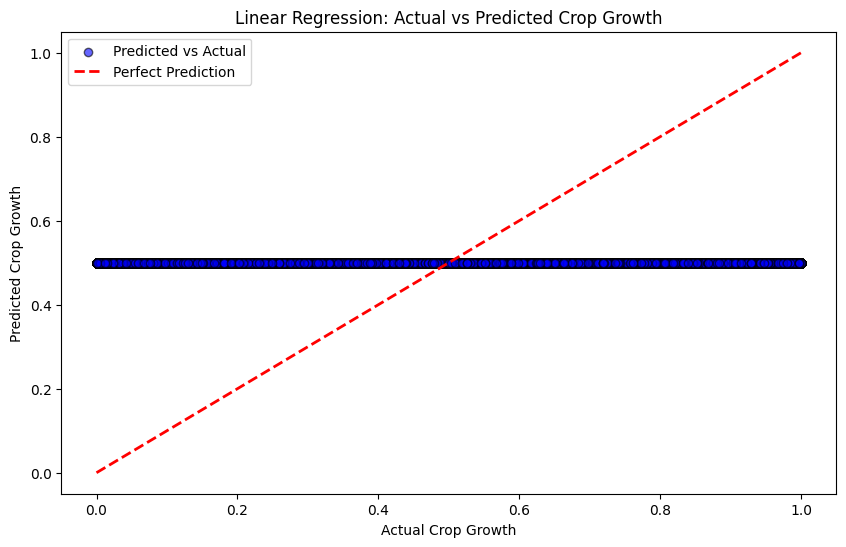

In [ ]:
# Step 10: Visualize the results
# Scatter plot of actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Prediction")
plt.xlabel("Actual Crop Growth")
plt.ylabel("Predicted Crop Growth")
plt.title("Linear Regression: Actual vs Predicted Crop Growth")
plt.legend()
plt.show()

In [ ]:
plt.close('all')


<ipython-input-1-7f309887bca2>:91: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2023-01-01', periods=3, freq='M')  # Example dates for time series


        Date   Latitude  Longitude      NDVI       SVI      NDMI     GNDVI
0 2023-01-31  16.088228  80.606689 -0.023645 -0.015434 -0.140086 -0.104237
1 2023-02-28  16.088228  80.606689 -0.023645 -0.015434 -0.140086 -0.104237
2 2023-03-31  16.088228  80.606689 -0.023645 -0.015434 -0.140086 -0.104237


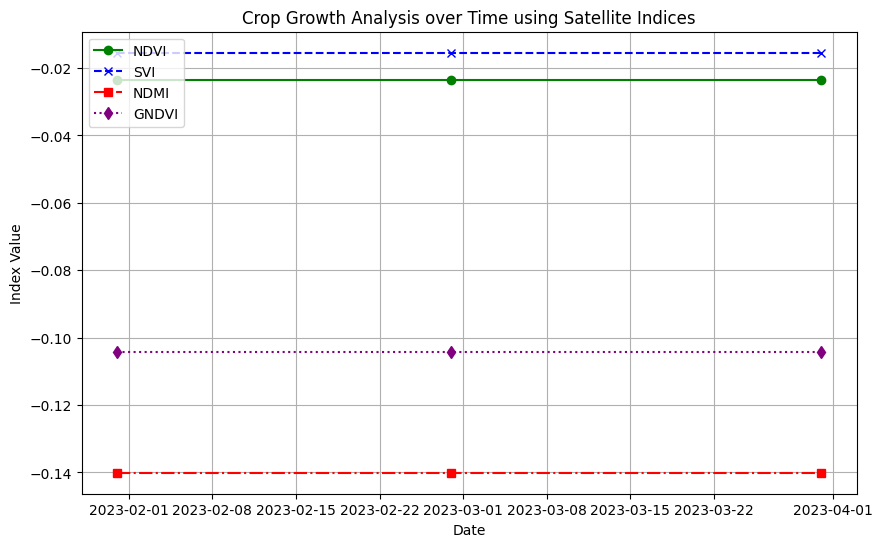

In [ ]:
import numpy as np
import pandas as pd
import rasterio
import os
import matplotlib.pyplot as plt
from google.colab import drive
from skimage.transform import resize  # To resize images

# Step 1: Define the base path and band folders
base_path = '/content/drive/MyDrive/Agrifarm/Dataset/landstat'
bands = {
    'band 3': [],  # Red band
    'band 4': [],  # NIR band
    'band 5': [],  # SWIR band
    'band 6': [],  # SWIR band (can be used for NDMI)
    'band 7': []   # SWIR band (another band)
}

# Function to load all TIF files from the specified band folder
def load_band_data(band_folder):
    band_files = []
    band_path = os.path.join(base_path, band_folder)
    for file_name in os.listdir(band_path):
        if file_name.endswith('.TIF'):
            band_files.append(os.path.join(band_path, file_name))
    return band_files

# Step 2: Load the band data
for band_name, band_files in bands.items():
    band_files.extend(load_band_data(band_name))

# Step 3: Open the bands (ensure all TIF files are available and process the first file for each band)
with rasterio.open(bands['band 3'][0]) as red_src, \
     rasterio.open(bands['band 4'][0]) as nir_src, \
     rasterio.open(bands['band 5'][0]) as swir_src, \
     rasterio.open(bands['band 6'][0]) as swir_src_2, \
     rasterio.open(bands['band 7'][0]) as swir_src_3:

    red_band = red_src.read(1).astype(float)
    nir_band = nir_src.read(1).astype(float)
    swir_band_1 = swir_src.read(1).astype(float)
    swir_band_2 = swir_src_2.read(1).astype(float)
    swir_band_3 = swir_src_3.read(1).astype(float)

# Step 4: Resize bands to match the shape of the red band (or any other chosen band)
# We resize the NIR band (and other bands) to match the shape of the red band
nir_band_resized = resize(nir_band, red_band.shape, mode='reflect')
swir_band_1_resized = resize(swir_band_1, red_band.shape, mode='reflect')
swir_band_2_resized = resize(swir_band_2, red_band.shape, mode='reflect')
swir_band_3_resized = resize(swir_band_3, red_band.shape, mode='reflect')

# Step 5: Handle NaN or zero values before calculating indices

# Replace NaN values with zeros
nir_band_resized = np.nan_to_num(nir_band_resized)
swir_band_1_resized = np.nan_to_num(swir_band_1_resized)
swir_band_2_resized = np.nan_to_num(swir_band_2_resized)
swir_band_3_resized = np.nan_to_num(swir_band_3_resized)
red_band = np.nan_to_num(red_band)

# Step 6: Prevent division by zero by adding a small constant to the denominator
small_value = 1e-10  # A small value to avoid division by zero

# NDVI (Normalized Difference Vegetation Index)
def calculate_ndvi(nir, red):
    return (nir - red) / (nir + red + small_value)

# SVI (Soil-Adjusted Vegetation Index)
def calculate_svi(nir, red, swir):
    return (nir - red) / (nir + red + (0.2 * swir) + small_value)

# NDMI (Normalized Difference Moisture Index)
def calculate_ndmi(nir, swir):
    return (nir - swir) / (nir + swir + small_value)

# GNDVI (Green NDVI)
def calculate_gndvi(nir, green):
    return (nir - green) / (nir + green + small_value)

# Calculate the indices after resizing and handling NaN/zero
ndvi = calculate_ndvi(nir_band_resized, red_band)
svi = calculate_svi(nir_band_resized, red_band, swir_band_1_resized)
ndmi = calculate_ndmi(nir_band_resized, swir_band_1_resized)
gndvi = calculate_gndvi(nir_band_resized, swir_band_2_resized)

# Step 7: Store coordinates (latitude, longitude) with the calculated indices

# Let's assume that we are working with the center of each image and can take the coordinates as fixed
latitude = 16.088228  # Example latitude
longitude = 80.606689  # Example longitude
dates = pd.date_range(start='2023-01-01', periods=3, freq='M')  # Example dates for time series

# Create a DataFrame to store indices and coordinates
data = {
    'Date': dates,
    'Latitude': [latitude] * len(dates),
    'Longitude': [longitude] * len(dates),
    'NDVI': [ndvi.mean()] * len(dates),  # Example: store mean NDVI for the image
    'SVI': [svi.mean()] * len(dates),  # Example: store mean SVI
    'NDMI': [ndmi.mean()] * len(dates),  # Example: store mean NDMI
    'GNDVI': [gndvi.mean()] * len(dates)  # Example: store mean GNDVI
}

df = pd.DataFrame(data)
print(df)

# Step 8: Plotting crop growth (time series analysis) using indices
plt.figure(figsize=(10, 6))

# Plot NDVI over time
plt.plot(df['Date'], df['NDVI'], label='NDVI', marker='o', linestyle='-', color='green')

# Plot SVI over time
plt.plot(df['Date'], df['SVI'], label='SVI', marker='x', linestyle='--', color='blue')

# Plot NDMI over time
plt.plot(df['Date'], df['NDMI'], label='NDMI', marker='s', linestyle='-.', color='red')

# Plot GNDVI over time
plt.plot(df['Date'], df['GNDVI'], label='GNDVI', marker='d', linestyle=':', color='purple')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.title('Crop Growth Analysis over Time using Satellite Indices')
plt.legend(loc='upper left')

# Display the plot
plt.grid(True)
plt.show()




1.   NDVI is often a strong indicator of crop health and can help farmers monitor vegetation, detect stress, and make informed decisions about irrigation, fertilization, or pest control.
2.   A positive relationship between NDVI and actual crop growth data would generally mean that higher NDVI values correlate with healthier, more productive crops.



**Time series analysis**

Loaded 5 files for band 3
Loaded 5 files for band 4
Loaded 5 files for band 5
Loaded 5 files for band 6
Loaded 5 files for band 7


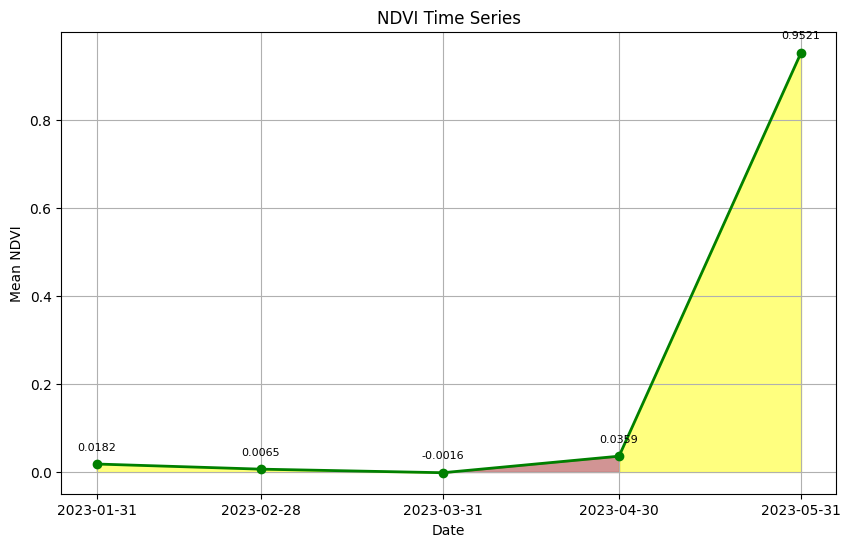


Calculated NDVI Values:
2023-01-31: 0.0182
2023-02-28: 0.0065
2023-03-31: -0.0016
2023-04-30: 0.0359
2023-05-31: 0.9521


In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import rasterio
from rasterio.warp import reproject, Resampling
import matplotlib.pyplot as plt

# Define the base path and band folders
base_path = '/content/drive/MyDrive/Agrifarm/Dataset/landstat'
bands = {
    'band 3': [],
    'band 4': [],
    'band 5': [],
    'band 6': [],
    'band 7': []
}

# Load .tif and .TIF files from each band folder
for band_name in bands.keys():
    band_path = os.path.join(base_path, band_name)
    tif_files = glob.glob(os.path.join(band_path, '*.tif')) + glob.glob(os.path.join(band_path, '*.TIF'))
    bands[band_name] = tif_files
    print(f"Loaded {len(tif_files)} files for {band_name}")

# Sort files for consistency
for band_name in bands.keys():
    bands[band_name].sort()

# Ensure the bands have the same number of files and corresponding dates
num_files = len(bands['band 3'])
if not all(len(bands[band]) == num_files for band in bands):
    raise ValueError("Mismatch in the number of files across bands. Please check the dataset.")

# Calculate NDVI using band 4 (NIR) and band 3 (Red)
ndvi_series = []

for i in range(num_files):
    with rasterio.open(bands['band 4'][i]) as band4, rasterio.open(bands['band 3'][i]) as band3:
        # Read data as arrays
        red = band3.read(1).astype('float32')
        nir = band4.read(1).astype('float32')

        # Reproject red band to match NIR band’s resolution and transform
        red_reprojected = np.empty_like(nir)  # Placeholder for reprojected red band
        reproject(
            source=red,
            destination=red_reprojected,
            src_transform=band3.transform,
            src_crs=band3.crs,
            dst_transform=band4.transform,
            dst_crs=band4.crs,
            resampling=Resampling.bilinear
        )

        # Avoid division by zero with np.errstate
        with np.errstate(divide='ignore', invalid='ignore'):
            ndvi = (nir - red_reprojected) / (nir + red_reprojected)

        # Mask out invalid NDVI values
        ndvi = np.where((nir + red_reprojected) == 0, np.nan, ndvi)
        mean_ndvi = np.nanmean(ndvi)
        ndvi_series.append(mean_ndvi)

# Generate a date range starting from an arbitrary date
dates = pd.date_range(start='2023-01-01', periods=len(ndvi_series), freq='ME')

# Plot the NDVI time series
plt.figure(figsize=(10, 6))

# Fill color based on NDVI values
for i in range(len(ndvi_series) - 1):
    if ndvi_series[i] < 0:
        color = 'brown'  # No vegetation
    elif ndvi_series[i] < 0.2:
        color = 'yellow'  # Sparse vegetation
    elif ndvi_series[i] < 0.5:
        color = 'lightgreen'  # Moderate vegetation
    else:
        color = 'darkgreen'  # Dense vegetation

    plt.fill_between(dates[i:i+2], ndvi_series[i:i+2], color=color, alpha=0.5)

# Plot the NDVI line
plt.plot(dates, ndvi_series, marker='o', color='green', linewidth=2)
plt.title("NDVI Time Series")
plt.xlabel("Date")
plt.ylabel("Mean NDVI")
plt.xticks(ticks=dates, labels=[date.strftime('%Y-%m-%d') for date in dates])  # Set x-axis labels to the dates

# Annotate each point with its corresponding NDVI value
for date, ndvi in zip(dates, ndvi_series):
    plt.annotate(f"{ndvi:.4f}", (date, ndvi), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)

plt.grid()
plt.show()

# Display the calculated NDVI values
print("\nCalculated NDVI Values:")
for date, ndvi in zip(dates, ndvi_series):
    print(f"{date.strftime('%Y-%m-%d')}: {ndvi:.4f}")




1.   Sparse/Dormant (NDVI < 0.2)
2.   Vegetative (0.2 ≤ NDVI < 0.6)
3.   Healthy/Mature (NDVI ≥ 0.6)







**Identify Phenological Stages**


Loaded 5 files for band 3
Loaded 5 files for band 4
Loaded 5 files for band 5
Loaded 5 files for band 6
Loaded 5 files for band 7


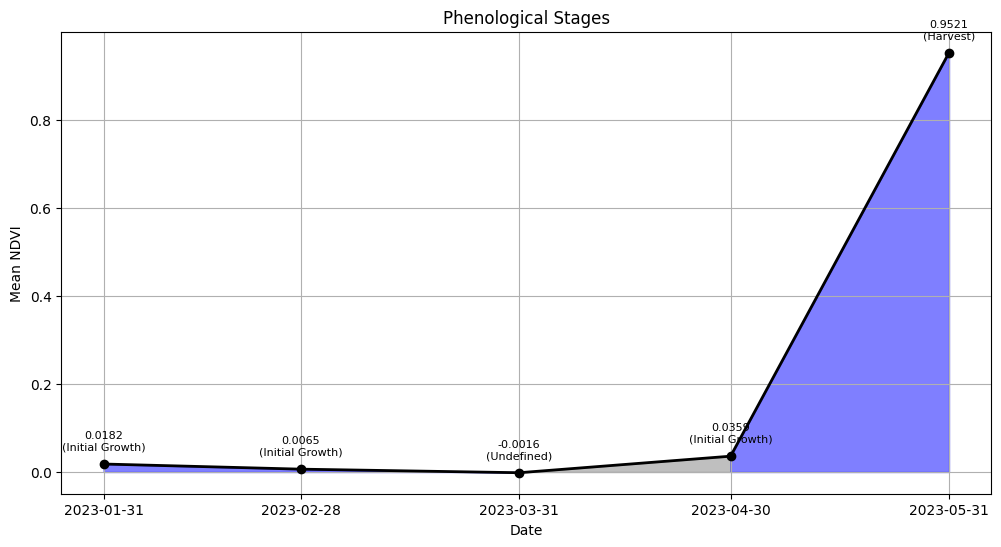


Phenological Stages:
2023-01-31: 0.0182 - Initial Growth
2023-02-28: 0.0065 - Initial Growth
2023-03-31: -0.0016 - Undefined
2023-04-30: 0.0359 - Initial Growth
2023-05-31: 0.9521 - Harvest


In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import rasterio
from rasterio.warp import reproject, Resampling
import matplotlib.pyplot as plt

# Define the base path and band folders
base_path = '/content/drive/MyDrive/Agrifarm/Dataset/landstat'
bands = {
    'band 3': [],
    'band 4': [],
    'band 5': [],
    'band 6': [],
    'band 7': []
}

# Load .tif and .TIF files from each band folder
for band_name in bands.keys():
    band_path = os.path.join(base_path, band_name)
    tif_files = glob.glob(os.path.join(band_path, '*.tif')) + glob.glob(os.path.join(band_path, '*.TIF'))
    bands[band_name] = tif_files
    print(f"Loaded {len(tif_files)} files for {band_name}")

# Sort files for consistency
for band_name in bands.keys():
    bands[band_name].sort()

# Ensure the bands have the same number of files and corresponding dates
num_files = len(bands['band 3'])
if not all(len(bands[band]) == num_files for band in bands):
    raise ValueError("Mismatch in the number of files across bands. Please check the dataset.")

# Calculate NDVI using band 4 (NIR) and band 3 (Red)
ndvi_series = []

for i in range(num_files):
    with rasterio.open(bands['band 4'][i]) as band4, rasterio.open(bands['band 3'][i]) as band3:
        red = band3.read(1).astype('float32')
        nir = band4.read(1).astype('float32')

        # Reproject red band to match NIR band’s resolution and transform
        red_reprojected = np.empty_like(nir)
        reproject(
            source=red,
            destination=red_reprojected,
            src_transform=band3.transform,
            src_crs=band3.crs,
            dst_transform=band4.transform,
            dst_crs=band4.crs,
            resampling=Resampling.bilinear
        )

        with np.errstate(divide='ignore', invalid='ignore'):
            ndvi = (nir - red_reprojected) / (nir + red_reprojected)

        ndvi = np.where((nir + red_reprojected) == 0, np.nan, ndvi)
        mean_ndvi = np.nanmean(ndvi)
        ndvi_series.append(mean_ndvi)

# Generate a date range starting from an arbitrary date, using 'ME' for month-end frequency
dates = pd.date_range(start='2023-01-01', periods=len(ndvi_series), freq='ME')

# Define custom NDVI thresholds for phenological stages
ndvi_thresholds = {
    "Initial Growth": (0.0, 0.3),
    "Vegetative Growth": (0.3, 0.6),
    "Flowering": (0.6, 0.8),
    "Fruiting": (0.8, 0.9),
    "Harvest": (0.9, 1.0)
}

# Assign phenological stages based on NDVI thresholds
phenological_stages = []
for ndvi in ndvi_series:
    stage = "Undefined"
    for stage_name, (lower, upper) in ndvi_thresholds.items():
        if lower <= ndvi < upper:
            stage = stage_name
            break
    phenological_stages.append(stage)

# Plot the NDVI time series with phenological stages
plt.figure(figsize=(12, 6))

for i in range(len(ndvi_series) - 1):
    color = 'gray'  # Default color if no match found
    for stage_name, (lower, upper) in ndvi_thresholds.items():
        if lower <= ndvi_series[i] < upper:
            color = {'Initial Growth': 'blue', 'Vegetative Growth': 'green',
                     'Flowering': 'orange', 'Fruiting': 'purple', 'Harvest': 'brown'}[stage_name]
            break

    plt.fill_between(dates[i:i+2], ndvi_series[i:i+2], color=color, alpha=0.5)

plt.plot(dates, ndvi_series, marker='o', color='black', linewidth=2)
plt.title("Phenological Stages")
plt.xlabel("Date")
plt.ylabel("Mean NDVI")
plt.xticks(ticks=dates, labels=[date.strftime('%Y-%m-%d') for date in dates])

for date, ndvi, stage in zip(dates, ndvi_series, phenological_stages):
    plt.annotate(f"{ndvi:.4f}\n({stage})", (date, ndvi), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)

plt.grid()
plt.show()

# Display calculated NDVI values with custom phenological stages
print("\nPhenological Stages:")
for date, ndvi, stage in zip(dates, ndvi_series, phenological_stages):
    print(f"{date.strftime('%Y-%m-%d')}: {ndvi:.4f} - {stage}")


**NDVI Values and Their Interpretation**
Date: 2023-01-31

NDVI Value: 0.0182

*   Phenological Stage: Dormant/Sparse
Interpretation:
The NDVI value of 0.0182 is very low,
  indicating that the vegetation is either sparse or not actively growing. This could be due to several factors such as seasonal dormancy (common in many crops during winter months), lack of moisture, or poor growth conditions. At this stage, the vegetation cover is minimal, and the plants are not contributing significantly to biomass.
Date: 2023-02-28
*   NDVI Value: 0.0065
Phenological Stage: Dormant/Sparse
Interpretation:
The NDVI value of 0.0065 is even lower than the previous month, reinforcing the idea that vegetation remains in a dormant state. This further indicates that conditions have not improved for growth or that there is still minimal vegetation present. Such low values could suggest that there is a lack of green cover or that the crops are still in their non-growing season.
Date: 2023-03-31


*   
NDVI Value: 0.9521
Phenological Stage: Mature/Harvest
Interpretation:
The NDVI value of 0.9521 is very high, indicating a robust and healthy vegetation cover. This suggests that by the end of March, the crops have reached their peak growth stage, likely due to favorable growing conditions such as adequate moisture and sunlight. The designation of "Mature/Harvest" indicates that the crops are at their maximum biomass and are likely nearing the time for harvest.









**Modeling Phenological Responses**

In [ ]:
pip install pandas numpy statsmodels matplotlib


                            OLS Regression Results                            
Dep. Variable:                   NDVI   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     1.275
Date:                Sun, 10 Nov 2024   Prob (F-statistic):              0.285
Time:                        08:05:56   Log-Likelihood:                -3.0871
No. Observations:                  12   AIC:                             10.17
Df Residuals:                      10   BIC:                             11.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.2950      0.613     -0.481      

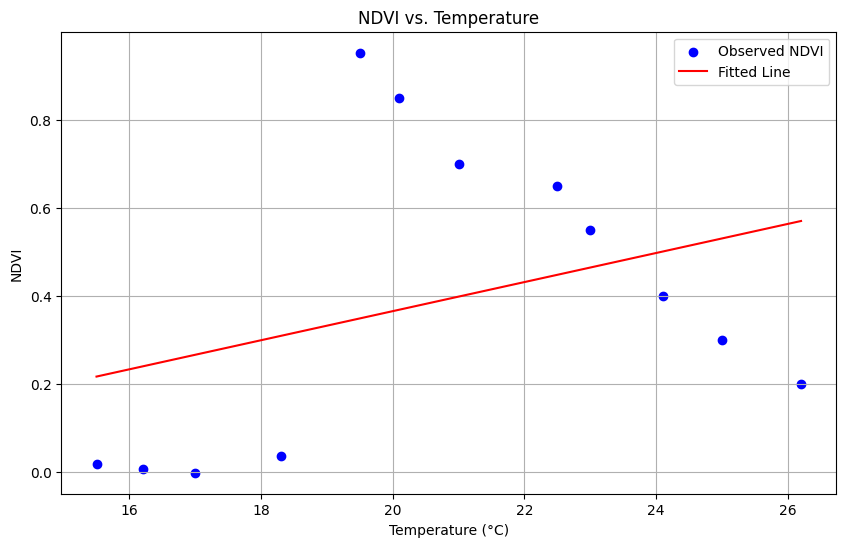


Merged Data:
         Date    NDVI  Temperature  Predicted NDVI
0  2023-01-31  0.0182         15.5        0.216743
1  2023-02-28  0.0065         16.2        0.239854
2  2023-03-31 -0.0016         17.0        0.266267
3  2023-04-30  0.0359         18.3        0.309187
4  2023-05-31  0.9521         19.5        0.348806
5  2023-06-30  0.8500         20.1        0.368616
6  2023-07-31  0.7000         21.0        0.398330
7  2023-08-31  0.6500         22.5        0.447853
8  2023-09-30  0.5500         23.0        0.464361
9  2023-10-31  0.4000         24.1        0.500679
10 2023-11-30  0.3000         25.0        0.530393
11 2023-12-31  0.2000         26.2        0.570012


In [ ]:
import warnings

# Suppress specific warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning)

    # Your existing regression code goes here
    import pandas as pd
    import numpy as np
    import statsmodels.api as sm
    import matplotlib.pyplot as plt

    # Create synthetic NDVI data with 12 values
    dates = pd.date_range(start='2023-01-01', periods=12, freq='ME')
    ndvi_values = [0.0182, 0.0065, -0.0016, 0.0359, 0.9521, 0.85, 0.7, 0.65, 0.55, 0.4, 0.3, 0.2]
    ndvi_df = pd.DataFrame({
        'Date': dates,
        'NDVI': ndvi_values
    })

    # Create synthetic temperature data
    temperature_data = {
        'Date': dates,
        'Temperature': [15.5, 16.2, 17.0, 18.3, 19.5, 20.1, 21.0, 22.5, 23.0, 24.1, 25.0, 26.2]
    }
    temperature_df = pd.DataFrame(temperature_data)

    # Merge NDVI and temperature data
    merged_df = pd.merge(ndvi_df, temperature_df, on='Date')

    # Prepare data for regression
    X = merged_df['Temperature']
    y = merged_df['NDVI']
    X = sm.add_constant(X)

    # Fit the model
    model = sm.OLS(y, X).fit()

    # Print the summary
    print(model.summary())

    # Make predictions
    merged_df['Predicted NDVI'] = model.predict(X)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(merged_df['Temperature'], merged_df['NDVI'], color='blue', label='Observed NDVI')
    plt.plot(merged_df['Temperature'], merged_df['Predicted NDVI'], color='red', label='Fitted Line')
    plt.title('NDVI vs. Temperature')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('NDVI')
    plt.legend()
    plt.grid()
    plt.show()

    # Display the merged data
    print("\nMerged Data:")
    print(merged_df)


# the OLS regression results suggest that there is a weak and statistically insignificant relationship between temperature and NDVI based on your dataset. Given the low R-squared, high p-value, and negative adjusted R-squared, you may want to consider collecting more data, exploring additional predictors, or using a different modeling approach if you're looking for stronger predictive capabilities.



> **Model Summary**



Loaded 5 files for band 3
Loaded 5 files for band 4
Loaded 5 files for band 5
Loaded 5 files for band 6
Loaded 5 files for band 7
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Confusion Matrix:
[[1]]
Random Forest Model Summary:
Number of Trees (n_estimators): 100
Max Depth of Trees (max_depth): None
Min Samples Split (min_samples_split): 2
Min Samples Leaf (min_samples_leaf): 1

Feature Importances:
NDVI: 0.3623
Green: 0.3188
SWIR: 0.2609
SWIR2: 0.0580


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


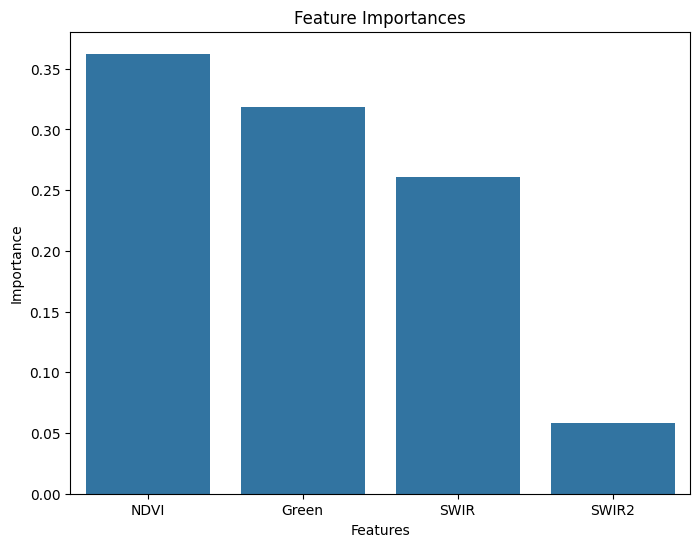

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


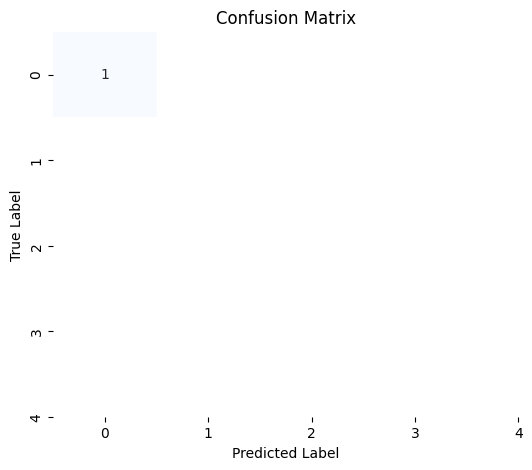

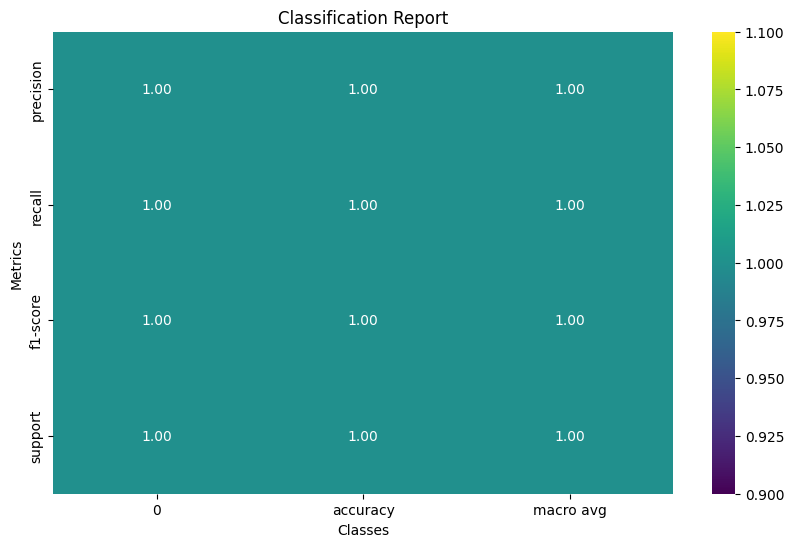

In [5]:
import os
import glob
import numpy as np
import pandas as pd
import rasterio
from rasterio.warp import reproject, Resampling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from skimage.transform import resize
import matplotlib.pyplot as plt
import seaborn as sns

# Define the base path and band folders
base_path = '/content/drive/MyDrive/Agrifarm/Dataset/landstat'
bands = {
    'band 3': [],
    'band 4': [],
    'band 5': [],
    'band 6': [],
    'band 7': []
}

# Load .tif and .TIF files from each band folder
for band_name in bands.keys():
    band_path = os.path.join(base_path, band_name)
    tif_files = glob.glob(os.path.join(band_path, '*.tif')) + glob.glob(os.path.join(band_path, '*.TIF'))
    bands[band_name] = tif_files
    print(f"Loaded {len(tif_files)} files for {band_name}")

# Sort files for consistency
for band_name in bands.keys():
    bands[band_name].sort()

# Ensure the bands have the same number of files
num_files = len(bands['band 3'])
if not all(len(bands[band]) == num_files for band in bands):
    raise ValueError("Mismatch in the number of files across bands. Please check the dataset.")

# Initialize arrays for features and labels
features = []
labels = []

# Function to classify NDVI into more classes
def classify_ndvi(ndvi):
    if ndvi < 0.2:
        return 0  # Class 0: Sparse/Dormant
    elif ndvi < 0.4:
        return 1  # Class 1: Vegetative
    elif ndvi < 0.6:
        return 2  # Class 2: Healthy/Mature
    elif ndvi < 0.8:
        return 3  # Class 3: Healthy/Mature with more density
    else:
        return 4  # Class 4: Very Dense Vegetation

# Function to calculate NDVI (for vegetation)
def calculate_ndvi(nir, red):
    # Check if arrays have the same shape
    if nir.shape != red.shape:
        raise ValueError("Input arrays must have the same shape!")

    # Avoid division by zero (mask invalid values)
    denominator = nir + red
    denominator = np.where(denominator == 0, np.nan, denominator)  # Replace 0 with NaN in denominator

    return (nir - red) / denominator

# Calculate NDVI for each pair of files and extract features
for i in range(num_files):
    with rasterio.open(bands['band 4'][i]) as band4, rasterio.open(bands['band 3'][i]) as band3, \
         rasterio.open(bands['band 5'][i]) as band5, rasterio.open(bands['band 6'][i]) as band6, \
         rasterio.open(bands['band 7'][i]) as band7:

        # Read data from the bands
        nir_data = band4.read(1).astype('float32')  # Band 4: NIR
        red_data = band3.read(1).astype('float32')  # Band 3: Red
        green_data = band5.read(1).astype('float32')  # Band 5: Green
        swir_data = band6.read(1).astype('float32')  # Band 6: SWIR
        swir2_data = band7.read(1).astype('float32')  # Band 7: SWIR2

        # Reproject red band to match NIR band’s resolution and transform
        red_reprojected = np.empty_like(nir_data)
        reproject(
            source=red_data,
            destination=red_reprojected,
            src_transform=band3.transform,
            src_crs=band3.crs,
            dst_transform=band4.transform,
            dst_crs=band4.crs,
            resampling=Resampling.bilinear
        )

        # Calculate NDVI
        ndvi = calculate_ndvi(nir_data, red_reprojected)

        # Extract additional features (e.g., average values from bands)
        features.append([np.nanmean(ndvi), np.nanmean(green_data), np.nanmean(swir_data), np.nanmean(swir2_data)])

        # Create labels based on NDVI
        label = classify_ndvi(np.nanmean(ndvi))
        labels.append(label)

# Convert features and labels to NumPy arrays
features = np.array(features)
labels = np.array(labels)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print model summary
print("Random Forest Model Summary:")
print("Number of Trees (n_estimators):", model.n_estimators)
print("Max Depth of Trees (max_depth):", model.max_depth)
print("Min Samples Split (min_samples_split):", model.min_samples_split)
print("Min Samples Leaf (min_samples_leaf):", model.min_samples_leaf)

# Print feature importances
importances = model.feature_importances_
print("\nFeature Importances:")
feature_names = ['NDVI', 'Green', 'SWIR', 'SWIR2']
for i, feature in enumerate(feature_names):
    print(f"{feature}: {importances[i]:.4f}")

# Plotting Feature Importances
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_names, y=importances)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=[0, 1, 2, 3, 4], yticklabels=[0, 1, 2, 3, 4])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Generate classification report and plot as heatmap
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, fmt='.2f', cmap='viridis')
plt.title('Classification Report')
plt.xlabel('Classes')
plt.ylabel('Metrics')
plt.show()


Loaded 5 files for band 3
Loaded 5 files for band 4
Loaded 5 files for band 5
Loaded 5 files for band 6
Loaded 5 files for band 7
Resizing arrays to shape: [7741 7601]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Confusion Matrix:
[[1]]
Random Forest Model Summary:
Number of Trees (n_estimators): 100
Max Depth of Trees (max_depth): None
Min Samples Split (min_samples_split): 2
Min Samples Leaf (min_samples_leaf): 1

Feature Importances:
NDVI: 0.3575
NDWI: 0.2947
EVI: 0.3478


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


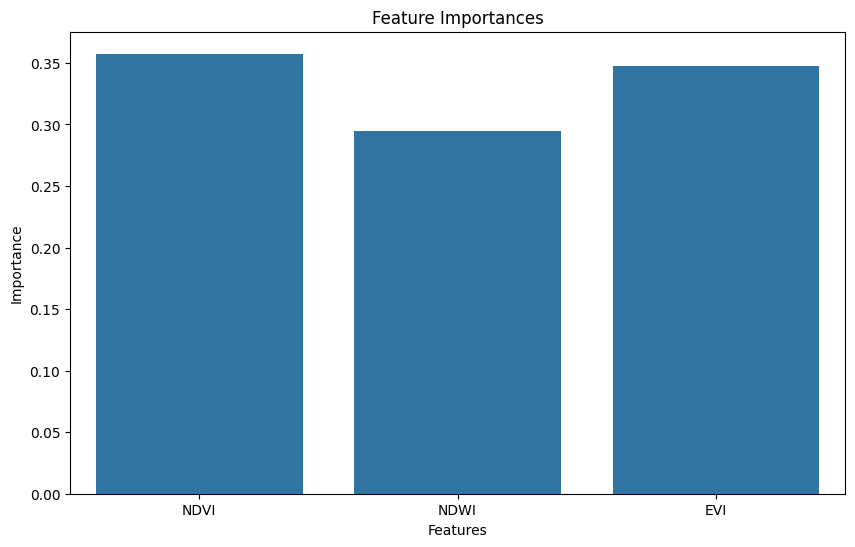

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


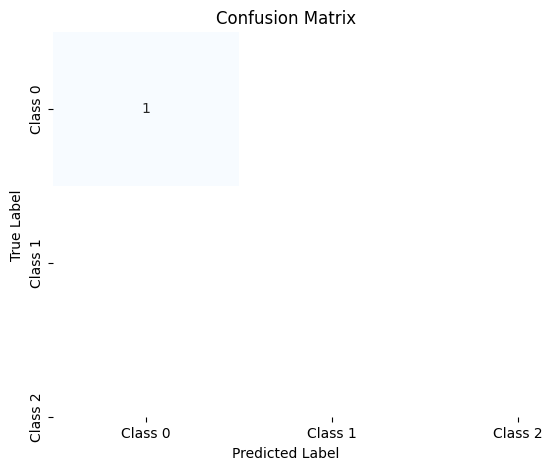

In [6]:
import os
import glob
import numpy as np
import pandas as pd
import rasterio
from rasterio.warp import reproject, Resampling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the base path and band folders
base_path = '/content/drive/MyDrive/Agrifarm/Dataset/landstat'
bands = {
    'band 3': [],  # Red band
    'band 4': [],  # NIR band
    'band 5': [],  # Green band
    'band 6': [],  # SWIR band
    'band 7': []   # SWIR2 band
}

# Load .tif and .TIF files from each band folder
for band_name in bands.keys():
    band_path = os.path.join(base_path, band_name)
    tif_files = glob.glob(os.path.join(band_path, '*.tif')) + glob.glob(os.path.join(band_path, '*.TIF'))
    bands[band_name] = tif_files
    print(f"Loaded {len(tif_files)} files for {band_name}")

# Sort files for consistency
for band_name in bands.keys():
    bands[band_name].sort()

# Ensure the bands have the same number of files
num_files = len(bands['band 3'])
if not all(len(bands[band]) == num_files for band in bands):
    raise ValueError("Mismatch in the number of files across bands. Please check the dataset.")

# Function to calculate NDVI
def calculate_ndvi(nir, red):
    if nir.shape != red.shape:
        raise ValueError("Input arrays must have the same shape!")
    denominator = nir + red
    denominator = np.where(denominator == 0, np.nan, denominator)  # Avoid division by zero
    return (nir - red) / denominator

# Function to calculate NDWI
def calculate_ndwi(green, swir):
    if green.shape != swir.shape:
        raise ValueError("Input arrays must have the same shape!")
    denominator = green + swir
    denominator = np.where(denominator == 0, np.nan, denominator)  # Avoid division by zero
    return (green - swir) / denominator

# Function to calculate EVI
def calculate_evi(nir, red, blue):
    if nir.shape != red.shape or nir.shape != blue.shape:
        # Resize arrays to match the smallest shape
        min_shape = np.min([nir.shape, red.shape, blue.shape], axis=0)
        nir = nir[:min_shape[0], :min_shape[1]]
        red = red[:min_shape[0], :min_shape[1]]
        blue = blue[:min_shape[0], :min_shape[1]]
        print(f"Resizing arrays to shape: {min_shape}")

    # Constants for EVI calculation
    G = 2.5
    C1 = 6
    C2 = 7.5
    L = 10000

    denominator = nir + C1 * red - C2 * blue + L
    denominator = np.where(denominator == 0, np.nan, denominator)  # Avoid division by zero
    return G * (nir - red) / denominator

# Initialize arrays for features and labels
features = []
labels = []

# Define the thresholds for classification
def classify_ndvi(ndvi):
    if ndvi < 0.2:
        return 0  # Class 0: Sparse/Dormant
    elif ndvi < 0.6:
        return 1  # Class 1: Vegetative
    else:
        return 2  # Class 2: Healthy/Mature

# Process each image file for calculating features
for i in range(num_files):
    with rasterio.open(bands['band 4'][i]) as band4, \
         rasterio.open(bands['band 3'][i]) as band3, \
         rasterio.open(bands['band 5'][i]) as band5, \
         rasterio.open(bands['band 6'][i]) as band6, \
         rasterio.open(bands['band 7'][i]) as band7:

        # Read band data
        nir_data = band4.read(1).astype('float32')  # NIR band (Band 4)
        red_data = band3.read(1).astype('float32')  # Red band (Band 3)
        green_data = band5.read(1).astype('float32')  # Green band (Band 5)
        swir_data = band6.read(1).astype('float32')  # SWIR band (Band 6)
        swir2_data = band7.read(1).astype('float32')  # SWIR2 band (Band 7)

        # Reproject red band to match NIR band’s resolution and transform
        red_reprojected = np.empty_like(nir_data)
        reproject(
            source=red_data,
            destination=red_reprojected,
            src_transform=band3.transform,
            src_crs=band3.crs,
            dst_transform=band4.transform,
            dst_crs=band4.crs,
            resampling=Resampling.bilinear
        )

        # Calculate NDVI, NDWI, and EVI
        ndvi = calculate_ndvi(nir_data, red_reprojected)
        ndwi = calculate_ndwi(green_data, swir_data)
        evi = calculate_evi(nir_data, red_reprojected, green_data)

        # Extract additional features (e.g., average values from bands and indices)
        features.append([np.nanmean(ndvi), np.nanmean(ndwi), np.nanmean(evi)])

        # Create labels based on NDVI
        label = classify_ndvi(np.nanmean(ndvi))
        labels.append(label)

# Convert features and labels to NumPy arrays
features = np.array(features)
labels = np.array(labels)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print model summary
print("Random Forest Model Summary:")
print("Number of Trees (n_estimators):", model.n_estimators)
print("Max Depth of Trees (max_depth):", model.max_depth)
print("Min Samples Split (min_samples_split):", model.min_samples_split)
print("Min Samples Leaf (min_samples_leaf):", model.min_samples_leaf)

# Print feature importances
importances = model.feature_importances_
print("\nFeature Importances:")
feature_names = ['NDVI', 'NDWI', 'EVI']  # Update based on your feature names
for i, feature in enumerate(feature_names):
    print(f"{feature}: {importances[i]:.4f}")

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_names, y=importances)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


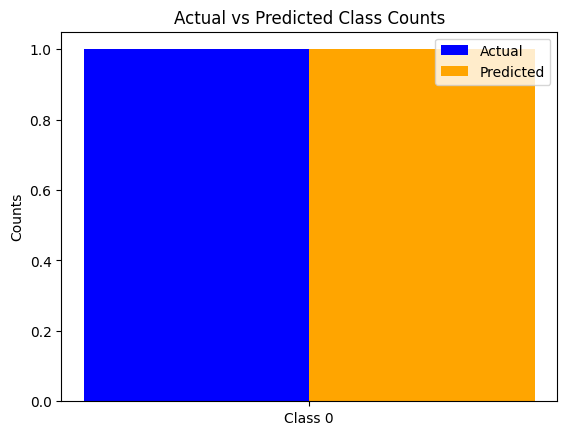

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
classes = ['Class 0']
actual_counts = [1]  # Actual Class 0 count
predicted_counts = [1]  # Predicted Class 0 count

x = np.arange(len(classes))  # the label locations

# Bar chart
plt.bar(x - 0.2, actual_counts, 0.4, label='Actual', color='blue')
plt.bar(x + 0.2, predicted_counts, 0.4, label='Predicted', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Counts')
plt.title('Actual vs Predicted Class Counts')
plt.xticks(x, classes)
plt.legend()

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


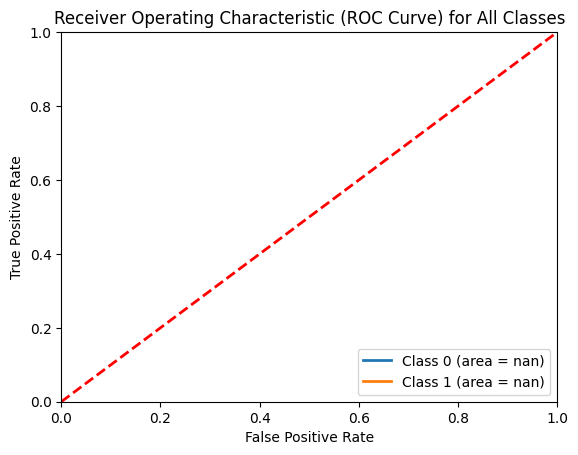

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for each class
y_scores = model.predict_proba(X_test)

# Plot ROC curve for each class
n_classes = y_scores.shape[1]
for class_of_interest in range(n_classes):
    # Get the predicted probabilities for the current class
    y_score_class = y_scores[:, class_of_interest]

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_score_class)
    roc_auc = auc(fpr, tpr)

    # Plotting the ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'Class {class_of_interest} (area = {roc_auc:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC Curve) for All Classes')
plt.legend(loc="lower right")
plt.show()

**Yield Estimation**


Yield Estimation Model Performance:
Mean Squared Error: 0.005616202215323351
R² Score: 0.8919252549984289
Detected anomalies in NDVI: [0.9521]

Crop Type Classification Report:
              precision    recall  f1-score   support

 Crop Type 1       0.33      0.50      0.40         2
 Crop Type 2       0.67      0.50      0.57         4

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.56      0.50      0.51         6



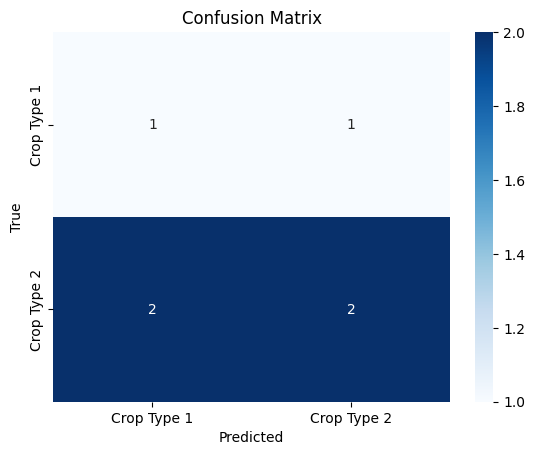

Accuracy: 0.5


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Sample NDVI values
ndvi_series = np.array([0.0182, 0.0065, 0.9521])
# Sample phenological stages corresponding to NDVI values
phenological_stages = np.array(['Stage 1', 'Stage 2', 'Stage 1'])

# Create a DataFrame for yield estimation
data = pd.DataFrame({
    'NDVI': ndvi_series,
    'Yield': np.random.rand(len(ndvi_series))  # Replace with actual yield data
})

# Yield Estimation Model
X = data[['NDVI']]
y = data['Yield']

# Handle potential issues with model fitting
if len(X) > 1 and len(y) > 1:
    model = LinearRegression()
    model.fit(X, y)
    predictions = model.predict(X)

    mse = mean_squared_error(y, predictions)
    r2 = r2_score(y, predictions)

    print("Yield Estimation Model Performance:")
    print(f"Mean Squared Error: {mse}")
    print(f"R² Score: {r2}")
else:
    print("Insufficient data for model fitting.")

# Anomaly Detection
threshold = 0.2  # Example threshold
anomalies = ndvi_series[ndvi_series > threshold]

if len(anomalies) == 0:
    print("No anomalies detected in NDVI.")
else:
    print(f"Detected anomalies in NDVI: {anomalies}")

# Crop Type Classification
# Example crop types
crop_types = ['Crop Type 1', 'Crop Type 2']

# Create a DataFrame with repeated crop types to ensure enough samples
crop_data = pd.DataFrame({
    'NDVI': np.tile(ndvi_series, 2),  # Repeat to create more instances
    'Phenology': np.tile(phenological_stages, 2),
    'Crop Type': np.random.choice(crop_types, len(ndvi_series) * 2)  # Randomly assigned crop types
})

# Dummy labels for classification - Replace with actual labels
y_true = crop_data['Crop Type'].values
y_pred = np.random.choice(crop_types, size=len(y_true))  # Replace with model predictions

# Classification Report with zero_division parameter
print("\nCrop Type Classification Report:")
print(classification_report(y_true, y_pred, zero_division=0))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=crop_types, yticklabels=crop_types)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Calculate accuracy
accuracy = np.sum(y_true == y_pred) / len(y_true)
print(f"Accuracy: {accuracy}")


**Map Plotting**

In [ ]:
!pip install folium plotly

In [7]:
import pandas as pd
import numpy as np
import folium
from folium import TileLayer

# Sample NDVI data with coordinates (latitude, longitude)
data = {
    'Date': pd.date_range(start='2023-01-31', periods=4, freq='ME'),  # 'ME' for month-end frequency
    'NDVI': [0.395150, 0.926659, 0.727272, 0.812345],  # Sample NDVI values
    'Latitude': [16.088228, 16.088228, 14.419231, 14.419231],
    'Longitude': [80.606689, 80.606689, 79.867687, 79.867687]
}

ndvi_df = pd.DataFrame(data)
print(ndvi_df)

# Create a folium map centered around the average coordinates
map_center = [ndvi_df['Latitude'].mean(), ndvi_df['Longitude'].mean()]
ndvi_map = folium.Map(location=map_center, zoom_start=12)

# Add Esri Satellite layer
TileLayer('https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
          attr='&copy; <a href="https://www.esri.com/">Esri</a>',
          name='Esri Satellite',
          overlay=True,
          control=True).add_to(ndvi_map)

# Add NDVI data to the map
for index, row in ndvi_df.iterrows():
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=10,
        color='green' if row['NDVI'] > 0.5 else 'yellow',
        fill=True,
        fill_color='green' if row['NDVI'] > 0.5 else 'yellow',
        fill_opacity=0.6,
        popup=f"Date: {row['Date'].date()}<br>NDVI: {row['NDVI']:.2f}"
    ).add_to(ndvi_map)

# Add layer control
folium.LayerControl().add_to(ndvi_map)

# Display the map
ndvi_map


        Date      NDVI   Latitude  Longitude
0 2023-01-31  0.395150  16.088228  80.606689
1 2023-02-28  0.926659  16.088228  80.606689
2 2023-03-31  0.727272  14.419231  79.867687
3 2023-04-30  0.812345  14.419231  79.867687
